<a href="https://colab.research.google.com/github/n-erfan/Data-Mining-Machine-Learning/blob/main/MiniProject2_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. a. Download the data file 'digits.mat' from Canvas.

  Ans: Downloaded and uploaded to gdrive

1. b. Load this data file to your program (in Matlab type: load digits.mat)

In [ ]:
#Access to Read from my Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import necessary librarires
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io

In [ ]:
mat = scipy.io.loadmat('/content/gdrive/MyDrive/Dataset/Data Mining and Machine Learning/digits.mat')

1. c. You will have four variables:
  
  Name | Size | Bytes | Class | Attributes

  test | 784x1000 | 784000 | uint8

  testlabels | 1000x1 | 1000 | uint8

  train | 784x5000 | 3920000 | uint8

  trainlabels | 5000x1 5000 | uint8
  


> The variable 'train' includes images of 5000 hand-written digits. However, to see images of these digits you should change 'train' from a 784 x 5000 to a variable such as 'x' which has the dimension of 28 x 28 x 5000. Then you will have five thousand 28 x 28 images of these digits.





In [ ]:
mat['train'].shape

(784, 5000)

In [ ]:
mat['trainlabels'].shape

(5000, 1)

In [ ]:
mat['test'].shape

(784, 1000)

In [ ]:
# Extract data from the MATLAB structure
train = mat['train']

# Reshape the 'train' variable to get 28x28 images
x = np.zeros((28, 28, 5000))

In [ ]:
# Column-major ordering
dummy = train[:, 0].reshape(28, 28, order='F')
dummy.shape

(28, 28)

Make the images visible

In [ ]:
# Reshape the 'train' variable to get 28x28 images
x = np.zeros((28, 28, 5000))

# save them in a 3d array
for k in range(5000):
  dummy = train[:, k].reshape(28, 28, order='F')
  x[:, :, k] = dummy

In [ ]:
mat['trainlabels'][0]

array([5], dtype=uint8)

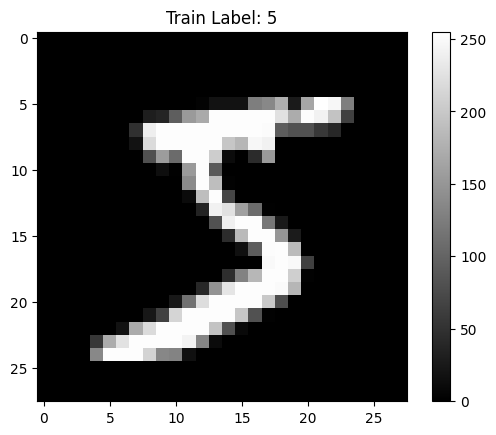

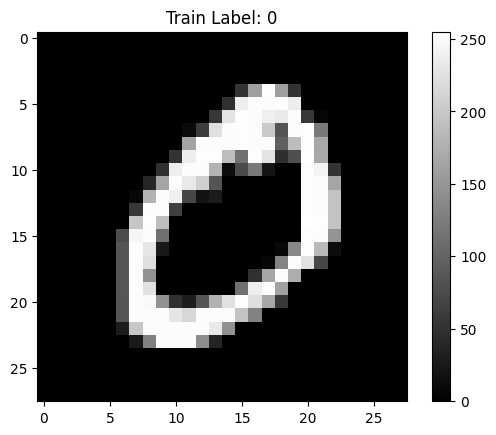

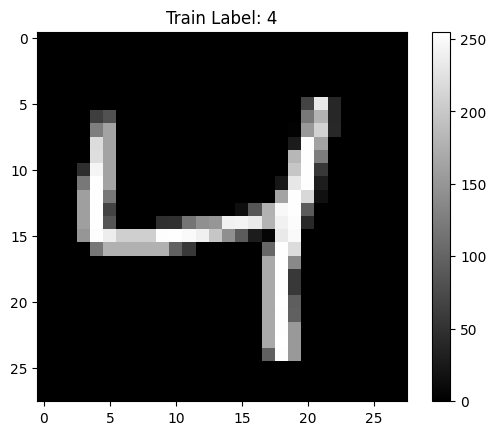

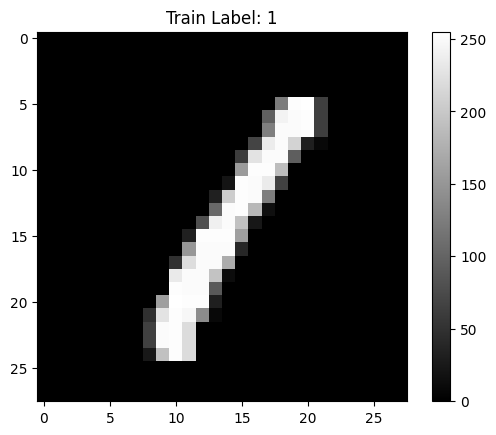

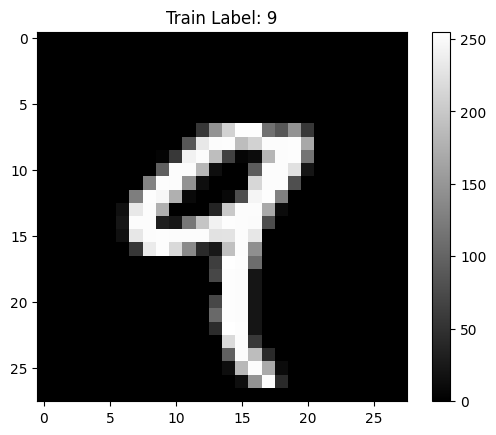

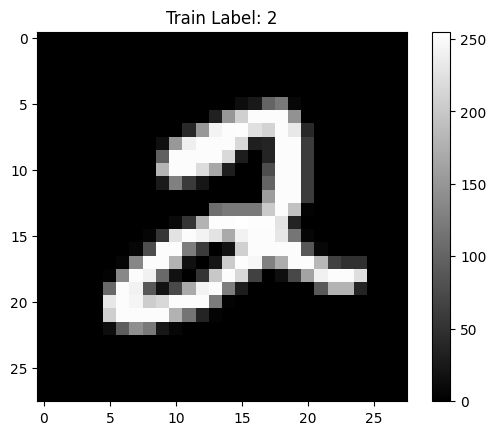

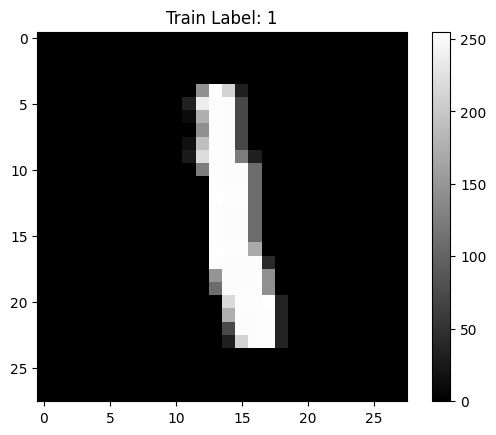

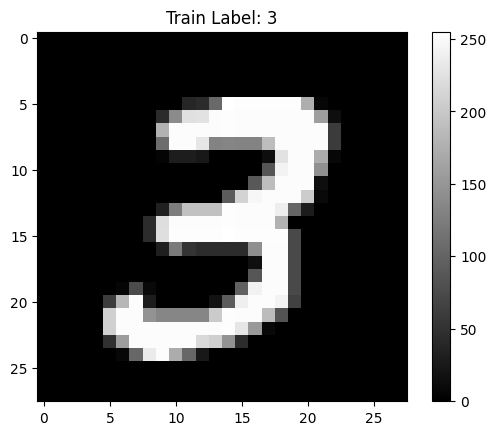

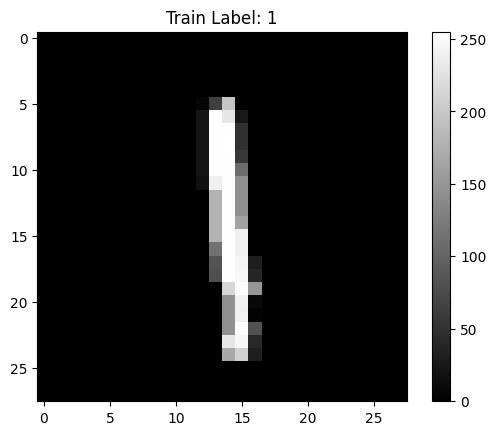

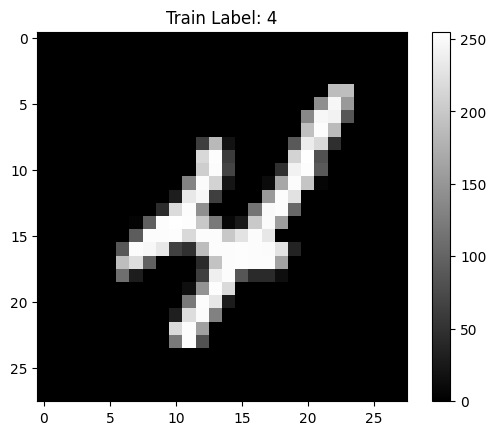

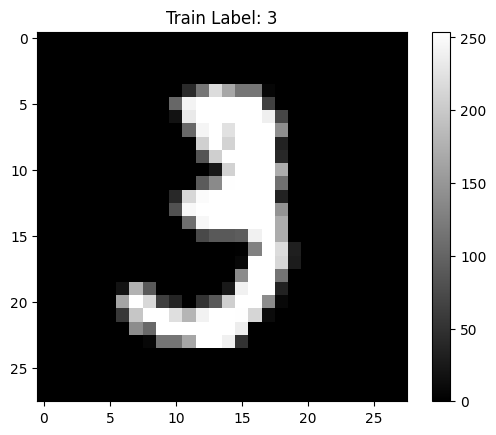

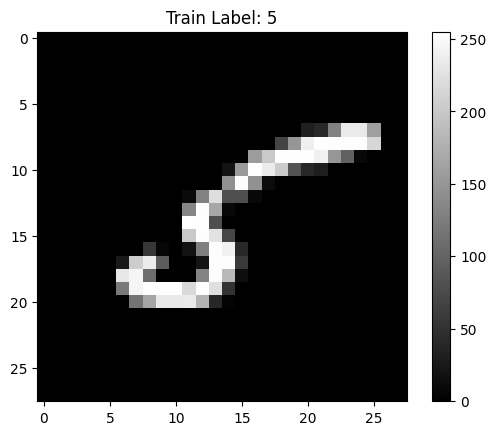

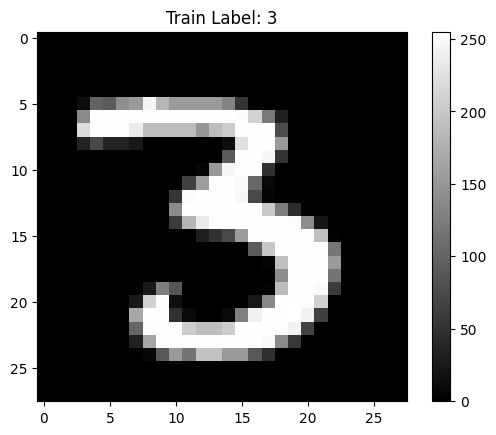

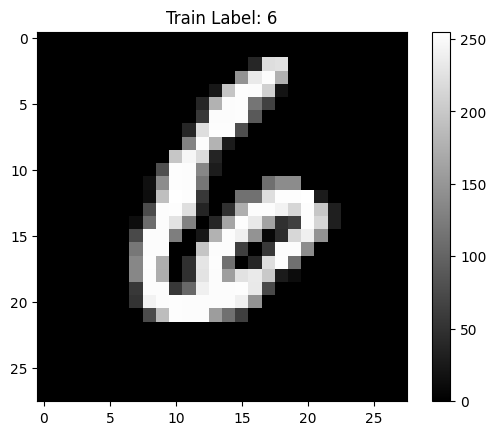

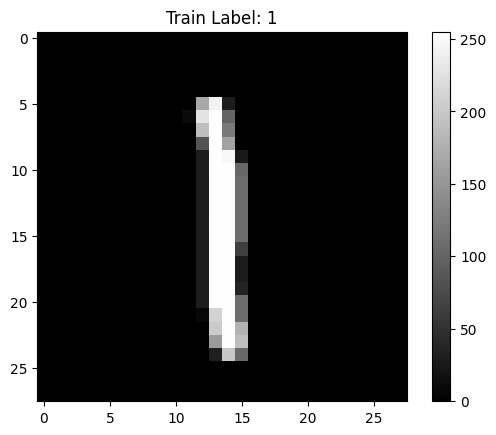

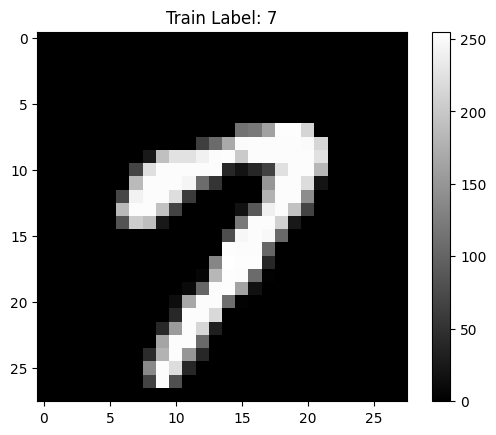

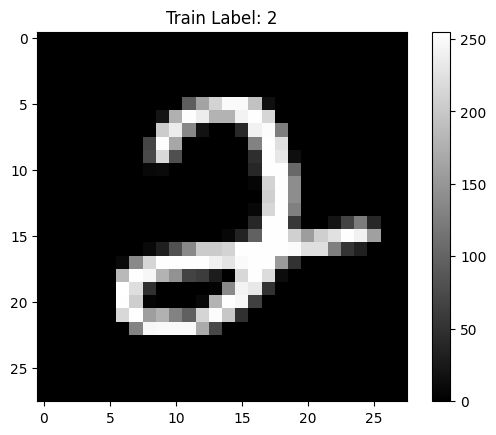

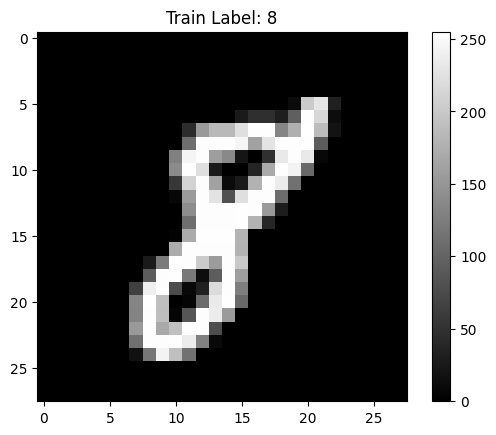

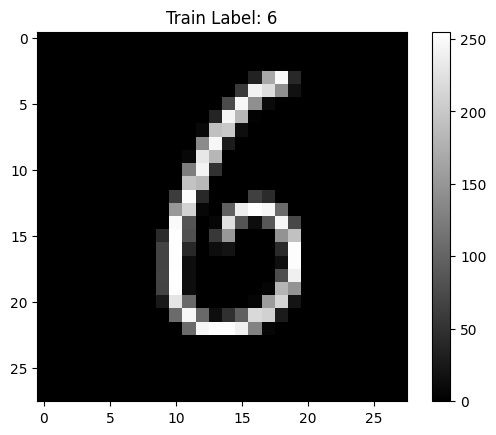

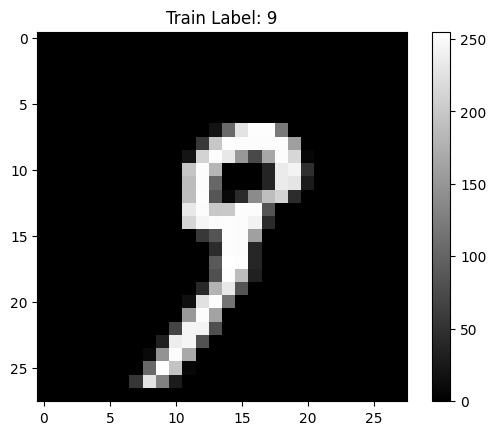

In [ ]:
# Display the first 5 images and the associated training labels
for k in range(20):
  plt.title(f"Train Label: {mat['trainlabels'][k][0]}")
  plt.imshow(x[:, :, k], cmap='gray')
  plt.colorbar()
  plt.gca().set_aspect('equal', adjustable='box')
  plt.show()
  print

1. d. Design and train a single-layer perceptron that can detect the digit '0'.In other words, your perceptron should return +1 when the digit in the image is '0' and -1 otherwise. Train your perceptron with 5000 images available in 'train' and test the performance of your system by using the other variable 'test', in your data file. When you are training your perceptron simultaneously, monitor the number of errors in the last 100 iterations. (Try to choose a reasonable value for your training rate and reduce it as a function of iteration number). How is the performance of the system? Also look at the image of your weights ‘w’ which is a 28 x 28 variable vector. How does it look? Why?

In [ ]:
zero_labels=np.zeros(len(mat['trainlabels']))

In [ ]:
mat['trainlabels'][1]

array([0], dtype=uint8)

In [ ]:
for i in range(len(mat['trainlabels'])):
  if mat['trainlabels'][i][0]==0:
    zero_labels[i]=1
  else:
    zero_labels[i]=-1

print(zero_labels)

[-1.  1. -1. ... -1. -1. -1.]


In [ ]:
w=np.zeros(784).reshape(784,1)
x=train

In [ ]:
w.shape

(784, 1)

In [ ]:
x[:,0].reshape(784,1).shape

(784, 1)

In [ ]:
# define the sgn function
def sgn(x, w):
  # if np.dot(x.T, w) <0:
  if x.T @ w <0:
    return -1
  else:
    return +1

In [ ]:
x[:,0].shape

(784,)

In [ ]:
X = x[:,1].reshape(784,1)
sgn(X,w)

1

In [ ]:
w=np.zeros(784).reshape(784,1)
x=train
num_e = 0
learn_rate = 2

for k in range(5000):
  X = x[:,k].reshape(784,1)
  # if right, then no need to change weights
  if sgn(X,w) == zero_labels[k]:
    w = w
  # if wrong change weights
  else:
    if k>=4900:
      num_e = num_e + 1
    if sgn(X,w)>0:
      # adaptive learning rate
      w = w - (learn_rate/(k+1)) * X
      if sgn(X,w) < 0:
        w = w
      else:
        learn_rate = learn_rate * 2
    else:
      w = w + (learn_rate/(k+1)) * X
      if sgn(X, w) > 0:
        w = w
      else:
        learn_rate = learn_rate * 2

# print training error rate/ misclassification rate
print(f"Last 100 Error rate: {num_e}%")

Last 100 Error rate: 1%


In [ ]:
learn_rate

4096

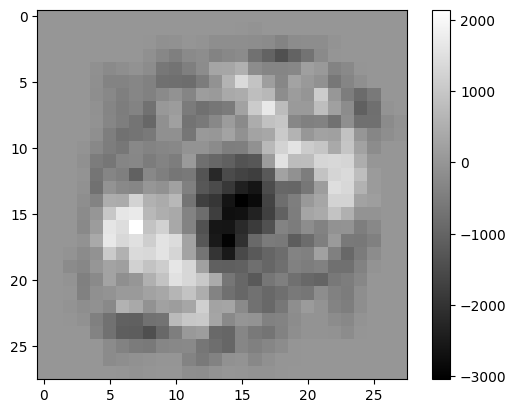

In [ ]:
# Display the image of the weight vector
plt.imshow(w.reshape(28, 28, order='F'), cmap='gray')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Looks like the shadow of the digit zero. This is because the weights are values that assign 0 value to everything else other than what conserves the shape of the digit. This is why the middle section of the image is black (lowest value), and a much lighter (higher values) circular region is surrounding it. This depicts a range of the region that the shape of a handdrawn zero may occupy.

In [ ]:
test=mat['test']
test.shape

(784, 1000)

In [ ]:
zero_test_labels=np.zeros(len(mat['testlabels']))
for i in range(len(mat['testlabels'])):
  if mat['testlabels'][i][0]==0:
    zero_test_labels[i]=1
  else:
    zero_test_labels[i]=-1

print(zero_test_labels.shape)

(1000,)


In [ ]:
# test the performance against new data using pre-trained weights and learning rate
x = test
num_e = 0

for k in range(x.shape[1]):
  X = x[:,k].reshape(x.shape[0],1)
  # if right, then no need to change weights
  if sgn(X,w) == zero_test_labels[k]:
    w = w
  # if wrong change weights
  else:
    if k>=(x.shape[1]-100):
      num_e = num_e + 1
    if sgn(X,w)>0:
      # adaptive learning rate
      w = w - (learn_rate/(k+1)) * X
      if sgn(X,w) < 0:
        w = w
      else:
        learn_rate = learn_rate * 2
    else:
      w = w + (learn_rate/(k+1)) * X
      if sgn(X, w) > 0:
        w = w
      else:
        learn_rate = learn_rate * 2

# print test error rate, i.e. misclassification rate
print(f"Last 100 Error rate: {num_e}%")

Last 100 Error rate: 0%


1. e. Repeat this experiment, but this time try to detect digit '8'. Does your network perform better or worse? Why? Now try '1' and '2'.

In [ ]:
# Define a function fro the single layer perceptron
def single_layer_per(x, w, learn_rate, labels):
  num_e = 0
  for k in range(x.shape[1]):
    X = x[:,k].reshape(x.shape[0],1)
    # if right, then no need to change weights
    if sgn(X,w) == labels[k]:
      w = w
    # if wrong change weights
    else:
      if k>=(x.shape[1]-100):
        num_e = num_e + 1
      if sgn(X,w)>0:
        # adaptive learning rate
        w = w - (learn_rate/(k+1)) * X
        if sgn(X,w) < 0:
          w = w
        else:
          learn_rate = learn_rate * 2
      else:
        w = w + (learn_rate/(k+1)) * X
        if sgn(X, w) > 0:
          w = w
        else:
          learn_rate = learn_rate * 2

  # return all the parameters in a dictionary
  return {'w': w, 'learn_rate' : learn_rate, 'last_100_err_rate' : num_e}

In [ ]:
# Define a function to show the weight image
def display_weights(w):
  plt.imshow(w.reshape(28, 28, order='F'), cmap='gray')
  plt.colorbar()
  plt.gca().set_aspect('equal', adjustable='box')
  plt.show()

In [ ]:
zero_train_per = single_layer_per(x=train, w=np.zeros(784).reshape(784,1), learn_rate=2, labels=zero_labels)
print(f"Training error for detecting zero: {zero_train_per['last_100_err_rate']}%")

Training error for detecting zero: 1%


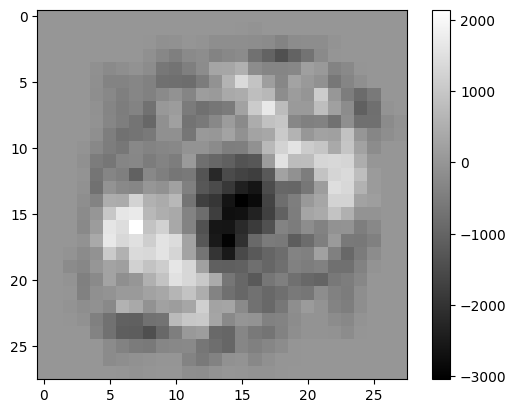

In [ ]:
display_weights(w=zero_train_per['w'])

In [ ]:
zero_test_per = single_layer_per(x=test, w=zero_train_per['w'], learn_rate=zero_train_per['learn_rate'], labels=zero_test_labels)
print(f"Testing error for detecting zero: {zero_test_per['last_100_err_rate']}%")

Testing error for detecting zero: 0%


In [ ]:
# train for detecting digit eight

eight_train_labels=np.zeros(len(mat['trainlabels']))
for i in range(len(mat['trainlabels'])):
  # select for 8
  if mat['trainlabels'][i][0]==8:
    eight_train_labels[i]=1
  else:
    eight_train_labels[i]=-1

# print(eight_train_labels[17])

eight_train_per = single_layer_per(x=train, w=np.zeros(784).reshape(784,1), learn_rate=2, labels=eight_train_labels)
print(f"Training error for detecting eight: {eight_train_per['last_100_err_rate']}%")

Training error for detecting eight: 9%


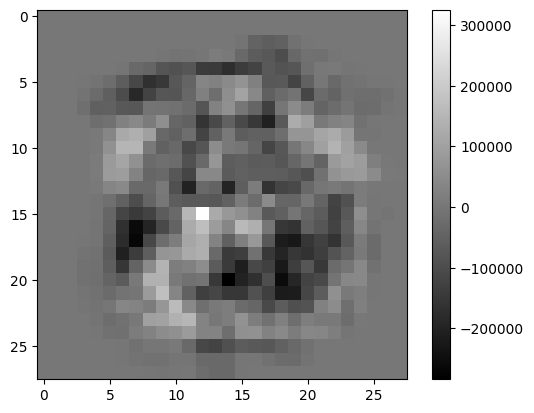

In [ ]:
display_weights(w=eight_train_per['w'])

Training error is pretty high because not many 8s in the dataset. In the weight map we see that no proper '8' shape was able to be traced by the SLP.

In [ ]:
# test for digit eight
eight_test_labels=np.zeros(len(mat['testlabels']))
for i in range(len(mat['testlabels'])):
  # select for 8
  if mat['testlabels'][i][0]==8:
    eight_test_labels[i]=1
  else:
    eight_test_labels[i]=-1

# print(eight_test_labels.shape)

# find the misclassification rate for test set
eight_test_per = single_layer_per(x=test, w=eight_train_per['w'], learn_rate=eight_train_per['learn_rate'], labels=eight_test_labels)
print(f"Testing error for detecting zero: {eight_test_per['last_100_err_rate']}%")

Testing error for detecting zero: 16%


Repeat for digits 1 and 2

In [ ]:
# train for detecting digit one

one_train_labels=np.zeros(len(mat['trainlabels']))
for i in range(len(mat['trainlabels'])):
  # select for 1
  if mat['trainlabels'][i][0]==1:
    one_train_labels[i]=1
  else:
    one_train_labels[i]=-1

# print(one_train_labels[3])

one_train_per = single_layer_per(x=train, w=np.zeros(784).reshape(784,1), learn_rate=2, labels=one_train_labels)
print(f"Training error for detecting one: {one_train_per['last_100_err_rate']}%")


Training error for detecting one: 2%


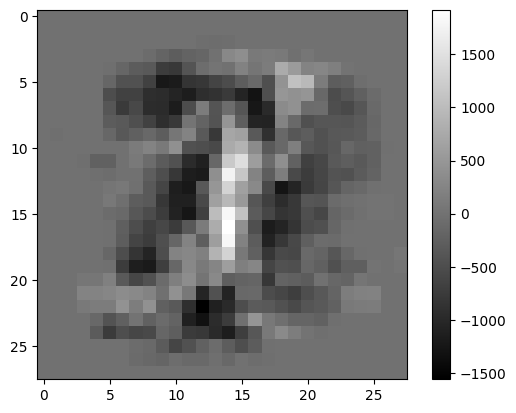

In [ ]:
display_weights(w=one_train_per['w'])

In [ ]:
# test for digit one
one_test_labels=np.zeros(len(mat['testlabels']))
for i in range(len(mat['testlabels'])):
  # select for 8
  if mat['testlabels'][i][0]==1:
    one_test_labels[i]=1
  else:
    one_test_labels[i]=-1

# find the misclassification rate for test set
one_test_per = single_layer_per(x=test, w=one_train_per['w'], learn_rate=one_train_per['learn_rate'], labels=one_test_labels)
print(f"Testing error for detecting one: {one_test_per['last_100_err_rate']}%")

Testing error for detecting one: 3%


In [ ]:
# train for detecting digit two

two_train_labels=np.zeros(len(mat['trainlabels']))
for i in range(len(mat['trainlabels'])):
  # select for 1
  if mat['trainlabels'][i][0]==2:
    two_train_labels[i]=1
  else:
    two_train_labels[i]=-1

# print(two_train_labels[5])

two_train_per = single_layer_per(x=train, w=np.zeros(784).reshape(784,1), learn_rate=2, labels=two_train_labels)
print(f"Training error for detecting two: {two_train_per['last_100_err_rate']}%")


Training error for detecting two: 10%


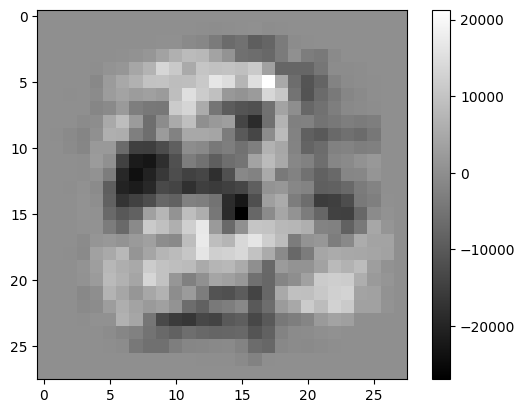

In [ ]:
display_weights(w=two_train_per['w'])

In [ ]:
# test for digit two
two_test_labels=np.zeros(len(mat['testlabels']))
for i in range(len(mat['testlabels'])):
  # select for 8
  if mat['testlabels'][i][0]==2:
    two_test_labels[i]=1
  else:
    two_test_labels[i]=-1

# find the misclassification rate for test set
two_test_per = single_layer_per(x=test, w=two_train_per['w'], learn_rate=two_train_per['learn_rate'], labels=two_test_labels)
print(f"Testing error for detecting two: {two_test_per['last_100_err_rate']}%")

Testing error for detecting two: 9%


2. Consider the following two-layer Perceptron. We have 784 input neurons, 25 hidden neurons, and 10 output neurons in this network. We want to use this network for digit recognition like what you did in problem 1. However, this time we have 10 output neurons. Neuron number i (i=0,1,2,...,9) should return 1 when the digit in the input pattern is 'i' and 0 otherwise. For example, if the input pattern represents number '2' the output vector should look like [0,0,1,0,0,0,0,0,0,0]. Therefore, in your project you prepare a computer code to train the network by adjusting weights for this task. The algorithm that we use in this project is BACK-PROPAGATION algorithm.

In [ ]:
# convert a digit (0-9) into 1d array
def digit_arr(digit):
  arr = np.zeros(10)
  arr[digit]=1
  return arr.reshape((10,1))

# test function
digit_arr(0)

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
train_labels = mat['trainlabels']
train_labels[1][0]

0

In [ ]:
digit_arr(train_labels[1][0])

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
np.argmax(digit_arr(train_labels[1][0]))

0

In [ ]:
# define the cost function
def cost_func(d, y):
  return 0.5 * np.sum((d-y)**2)

# test to see if it works
cost_func(digit_arr(train_labels[1][0]), digit_arr(0))

0.0

In [ ]:
# Logistic regression function phi at v
def logistic_func(v):
  v_clipped = np.clip(v, -500, 500)
  return 1 / (1 + np.exp(-v_clipped))

In [ ]:
# logistic function derivative at v
def logistic_deriv(v):
  return logistic_func(v) * (1- logistic_func(v))

In [ ]:
# Initialize the weights
w_h_i = np.random.uniform(-0.5, 0.5, (784,25))
w_o_h = np.random.uniform(-0.5, 0.5, (25,10))

In [ ]:
X = train[:,0].reshape((784,1))

In [ ]:
# first forward pass
v_h_i = (X.T @ w_h_i).T
y_h_i=logistic_func(v_h_i)
y_h_i.shape

(25, 1)

In [ ]:
# second forward pass
v_o_h = (y_h_i.T @ w_o_h).T
y_o_h=logistic_func(v_o_h)
y_o_h.shape

(10, 1)

In [ ]:
train_labels.shape

(5000, 1)

In [ ]:
y_o_h

array([[0.59932607],
       [0.48122251],
       [0.11767796],
       [0.51354488],
       [0.47883273],
       [0.3404462 ],
       [0.52714527],
       [0.73785744],
       [0.24237675],
       [0.40982967]])

In [ ]:
np.argmax(y_o_h)

7

In [ ]:
# calculate the error
e = digit_arr(train_labels[0][0])-y_o_h
e

array([[-0.59932607],
       [-0.48122251],
       [-0.11767796],
       [-0.51354488],
       [-0.47883273],
       [ 0.6595538 ],
       [-0.52714527],
       [-0.73785744],
       [-0.24237675],
       [-0.40982967]])

In [ ]:
# calculate delta at output
delta_o = e * logistic_deriv(v_o_h)
delta_o

array([[-0.14391877],
       [-0.12013595],
       [-0.01221848],
       [-0.128292  ],
       [-0.11949364],
       [ 0.14809792],
       [-0.13139788],
       [-0.14271922],
       [-0.04450771],
       [-0.09912522]])

In [ ]:
v_h_i.shape

(25, 1)

In [ ]:
# back propagate to hidden layer
delta_h = np.multiply(logistic_deriv(v_h_i) , w_o_h @ delta_o)
delta_h.shape

(25, 1)

In [ ]:
hidden_errors = np.dot(w_o_h, delta_o)
hidden_errors.shape

(25, 1)

In [ ]:
delta_h = hidden_errors * logistic_deriv(v_h_i)
delta_h.shape

(25, 1)

In [ ]:
y_o_h.shape

(10, 1)

In [ ]:
grad_cost_func =  np.multiply(y_h_i,delta_h)

In [ ]:
# calculate rate of change of cost function with respect to wieghts
learn_rate = 0.1
w_o_h = w_o_h - learn_rate * grad_cost_func

In [ ]:
w_h_i.shape

(784, 25)

In [ ]:
(X @ delta_h.T).shape

(784, 25)

In [ ]:
train_labels[2][0]

4

In [ ]:
t1=np.zeros((10,1))
t1[1]=-0.5
np.argmax(t1)

0

In [ ]:
# Initialize the weights
w_h_i = np.random.uniform(-1, 1, (784,25))
w_o_h = np.random.uniform(-1, 1, (25,10))

In [ ]:
w_o_h[:,:3]

array([[ 0.96229567, -0.47421735, -0.20955091],
       [ 0.83235976, -0.30240356,  0.65506627],
       [ 0.01538036,  0.25026534, -0.01908503],
       [ 0.12056026, -0.20989845, -0.95750106],
       [-0.77974472,  0.87663677,  0.11039039],
       [ 0.71781835, -0.44201609, -0.32585014],
       [-0.05705404,  0.95475926, -0.54768324],
       [-0.92217435, -0.08488309,  0.48111748],
       [-0.12827029, -0.56191143, -0.52437848],
       [ 0.93944749,  0.96297273,  0.52035122],
       [-0.75679723, -0.69998382, -0.02813099],
       [-0.88544797, -0.95926985,  0.38143985],
       [ 0.2903194 ,  0.49938207,  0.99916476],
       [ 0.55580211, -0.85496691,  0.15245993],
       [ 0.37429285,  0.63428418,  0.52861795],
       [ 0.48857887, -0.6071202 ,  0.96965333],
       [-0.78353852, -0.04913369, -0.95653943],
       [ 0.56820837, -0.67950318,  0.22620313],
       [ 0.73566779, -0.38898968, -0.77512256],
       [-0.49050465,  0.21606744, -0.13425831],
       [-0.2487675 , -0.13284402, -0.559

In [ ]:
# multi layer perceptron with one hidden layer
def multi_layer_per(x, labels, w_h_i, w_o_h, learn_rate, epochs):
  num_e = 0
  w_o_h_old = w_o_h
  w_h_i_old = w_h_i
  alpha = 0.5
  dic = {'Pred':[], 'err':0, 'w_h_i':0, 'w_o_h':0}

  for epoch in range(epochs):
    for i in range(x.shape[1]):
      X = x[:,i].reshape((x.shape[0],1))
      # first forward pass
      v_h_i = (X.T @ w_h_i).T
      y_h_i=logistic_func(v_h_i)

      # second forward pass
      v_o_h = (y_h_i.T @ w_o_h).T
      y_o_h=logistic_func(v_o_h)

      pred = np.argmax(y_o_h)

      # calculate the error
      e = digit_arr(labels[i][0]) - y_o_h

      # calculate delta at output
      delta_o = e * logistic_deriv(v_o_h)

      # back propagate to hidden layer
      delta_h = (w_o_h @ delta_o) * logistic_deriv(v_h_i)
      # hidden_errors = np.dot(w_o_h, delta_o)
      # delta_h = hidden_errors * logistic_deriv(v_h_i)

      # update the weights with adaptive learning rate using momentum constant

      # w_o_h += learn_rate * (y_h_i @ delta_o.T)
      del_w_o_h = w_o_h - w_o_h_old
      # w_o_h_old = w_o_h

      del_w_o_h = alpha*del_w_o_h + learn_rate * (y_h_i @ delta_o.T)
      w_o_h += del_w_o_h
      w_o_h_old = w_o_h

      # w_h_i += learn_rate * (X @ delta_h.T)
      del_w_h_i = w_h_i - w_h_i_old
      # w_h_i_old = w_h_i

      del_w_h_i = alpha*del_w_h_i + learn_rate * (X @ delta_h.T)
      w_h_i += del_w_h_i
      w_h_i_old = w_h_i

      if pred!=labels[i][0]:
        num_e += 1
      # save the prediction at the last epoch
      if epoch==epochs-1:
        dic['Pred'].append(pred)

  dic['w_h_i']=w_h_i
  dic['w_o_h']=w_o_h
  dic['err']=num_e/(x.shape[1]*epochs)

  return dic

In [ ]:
input = np.vstack((np.ones((1, 5000)), train ))
input.shape

(785, 5000)

In [ ]:
mlp_train = multi_layer_per(x=train, labels=train_labels, w_h_i=w_h_i, w_o_h=w_o_h, learn_rate=0.005, epochs=20)

In [ ]:
print(f"Percentage Training Error: {round(mlp_train['err']*100,2)}%")

Percentage Training Error: 39.93%


In [ ]:
train_labels[4999]

array([2], dtype=uint8)

In [ ]:
len(mlp_train['Pred'])

5000

In [ ]:
mlp_train['Pred'][len(mlp_train['Pred'])-1]

2

Now test using the learned weights

In [ ]:
test = mat['test']
test_input = np.vstack((np.ones((1, 1000)), test ))
test_labels = mat['testlabels']

In [ ]:
mlp_test = multi_layer_per(x=test, labels=test_labels, w_h_i=mlp_train['w_h_i'], w_o_h=mlp_train['w_o_h'], learn_rate=0.01, epochs=1)

In [ ]:
print(f"Percentage Testing Error: {round(mlp_test['err']*100,2)}%")

Percentage Testing Error: 32.0%


In [ ]:
# Comparing the last ten digits
for i in range(10):
  print(f"test_label: {test_labels[-i][0]} Vs predicted label: {mlp_test['Pred'][-i]}")

test_label: 7 Vs predicted label: 7
test_label: 9 Vs predicted label: 4
test_label: 8 Vs predicted label: 4
test_label: 0 Vs predicted label: 0
test_label: 2 Vs predicted label: 2
test_label: 2 Vs predicted label: 2
test_label: 1 Vs predicted label: 1
test_label: 0 Vs predicted label: 0
test_label: 9 Vs predicted label: 4
test_label: 3 Vs predicted label: 5


_______________________________________________

# **Convert the file to HTML**

In [ ]:
!pip install nbconvert

In [ ]:
%%shell
jupyter nbconvert --to html "/content/gdrive/MyDrive/Colab Notebooks/MiniProject2.ipynb"

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/MiniProject2.ipynb to html
[NbConvertApp] Writing 1181927 bytes to /content/gdrive/MyDrive/Colab Notebooks/MiniProject2.html
